## TensorFlow 2.x MNIST Classification with DNN (Only Dense Layers)

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout, BatchNormalization, GaussianNoise
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28*28)) / 255.0 
test_images = test_images.reshape((10000, 28*28)) / 255.0

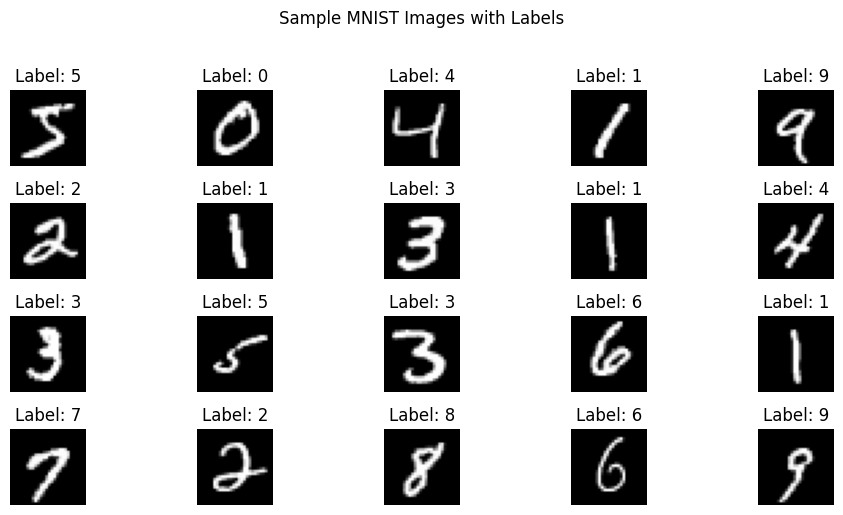

In [3]:
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.suptitle('Sample MNIST Images with Labels', y=1.02)
plt.tight_layout()
plt.show()

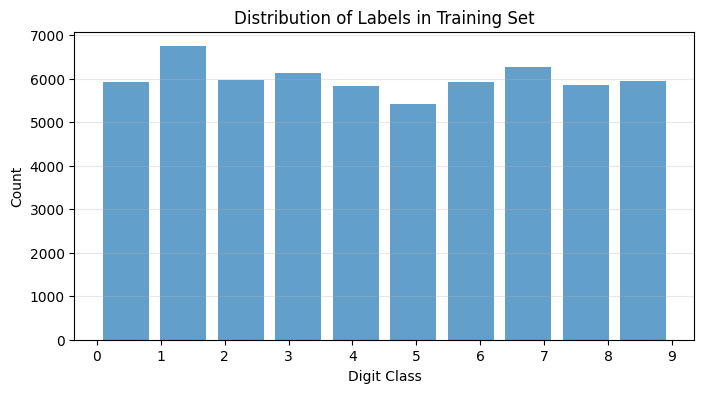

In [4]:
plt.figure(figsize=(8, 4))
plt.hist(train_labels, bins=10, rwidth=0.8, alpha=0.7)
plt.xticks(range(10))
plt.title('Distribution of Labels in Training Set')
plt.xlabel('Digit Class')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [5]:
model = models.Sequential([
    layers.GaussianNoise(0.1),
    layers.Dense(784, activation='relu', input_shape=(28*28,)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(2048, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    
    layers.Dense(10, activation='softmax')
])

c:\Internship 4th sem\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
lr_schedule = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=10, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_accuracy', patience=12, restore_best_weights=True)
model.compile(optimizer=Adam(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
callbacks=[early_stop, lr_schedule]
history = model.fit(train_images, 
                    train_labels, 
                    epochs=60, 
                    batch_size=128,
                    validation_data=(test_images, test_labels), 
                    callbacks=callbacks
                    )

Epoch 1/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - accuracy: 0.8804 - loss: 0.3898 - val_accuracy: 0.9640 - val_loss: 0.1190 - learning_rate: 0.0010
Epoch 2/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.9595 - loss: 0.1311 - val_accuracy: 0.9721 - val_loss: 0.0971 - learning_rate: 0.0010
Epoch 3/60
288/469 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.9707 - loss: 0.0951

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9843 - loss: 0.0618

Test accuracy: 0.9874


# Test Accuracy: 0.9874

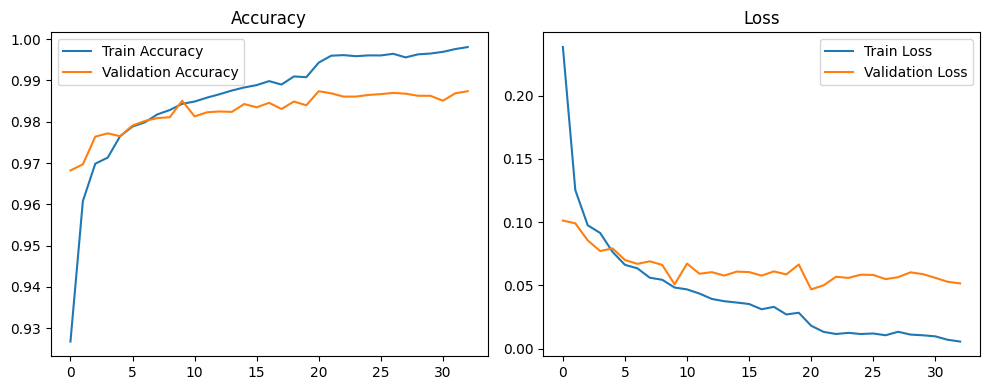

In [ ]:
# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


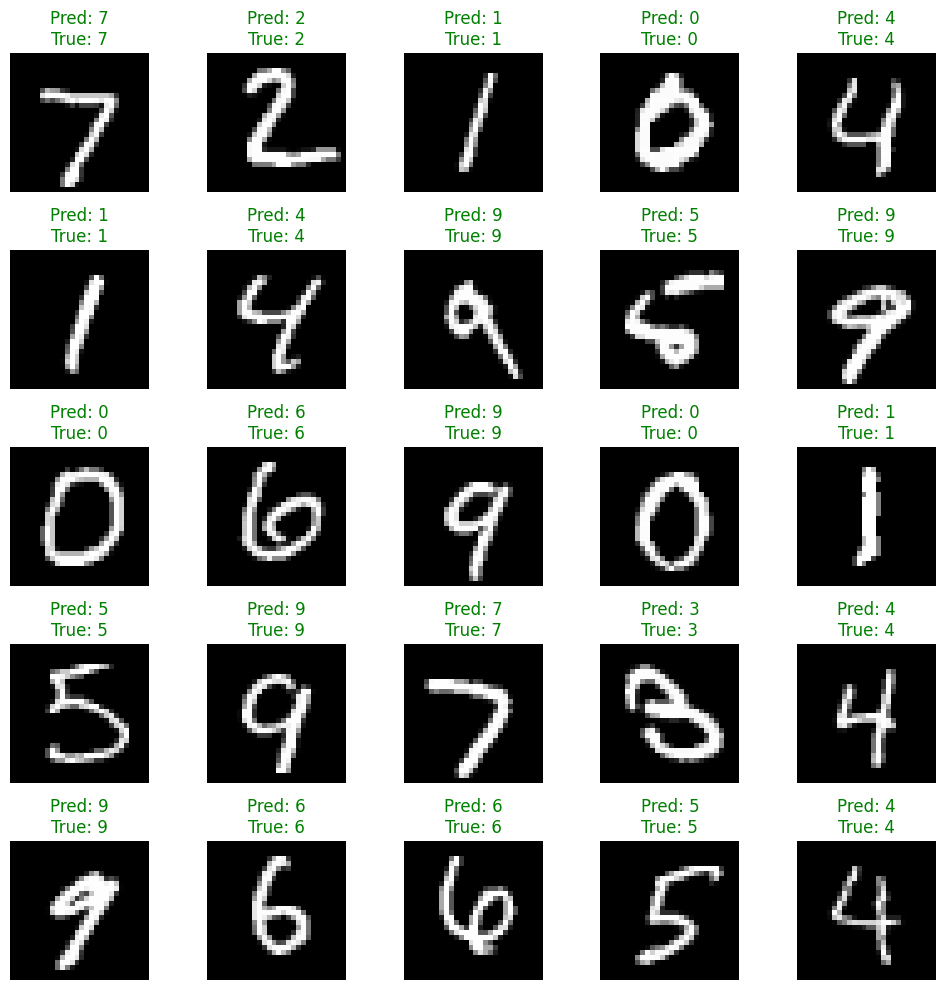

In [ ]:
# Make predictions and visualize
predictions = model.predict(test_images)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()